<a href="https://colab.research.google.com/github/aaryushi/GitHub-Practice-184/blob/master/PredictingStudentAcademicSuccess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [45]:
df = pd.read_csv('/content/Predict Student Dropout and Academic Success.csv', delimiter=';')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [47]:
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [48]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [49]:

X = df.drop("Target", axis=1)
y = df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


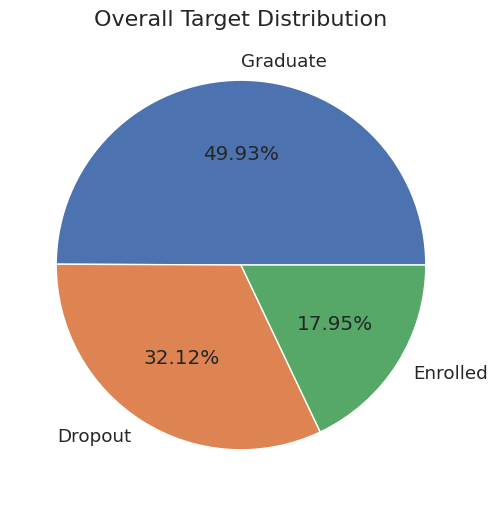

In [51]:
graduate_count = 2209
dropout_count = 1421
enrolled_count = 794

index_values = [graduate_count, dropout_count, enrolled_count]
index_labels = ['Graduate', 'Dropout', 'Enrolled']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Target Distribution', fontsize=16)

plt.show()

In [52]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.76
Confusion Matrix:
 [[244  23  49]
 [ 34  46  71]
 [  9  25 384]]
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.85      0.77      0.81       316
    Enrolled       0.49      0.30      0.38       151
    Graduate       0.76      0.92      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.76      0.75       885



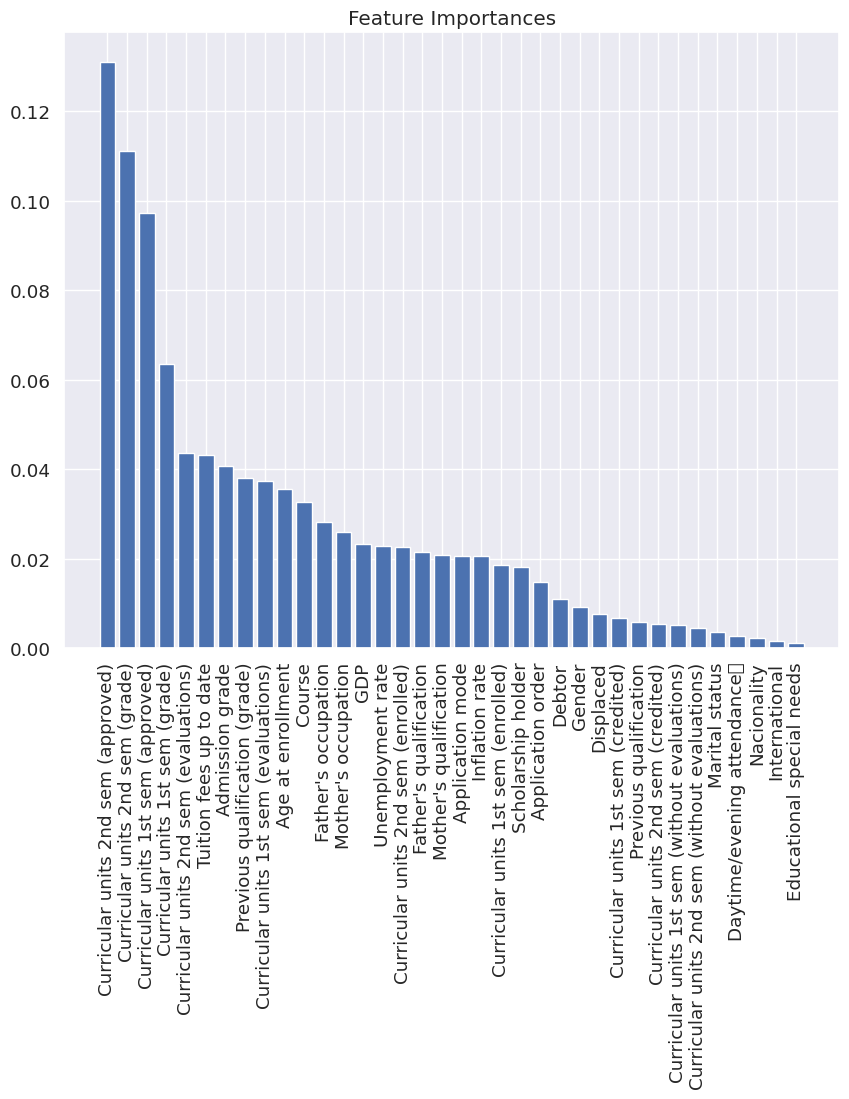

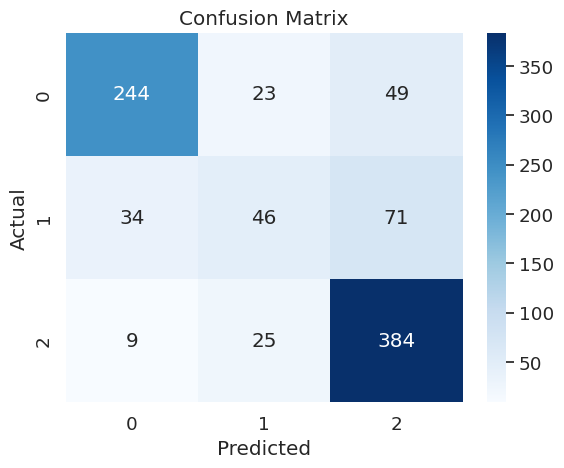

In [53]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Code from Parent paper:

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [55]:
data = pd.read_csv('Predict Student Dropout and Academic Success.csv', delimiter=';')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [56]:
sns.set(font_scale=1.2)

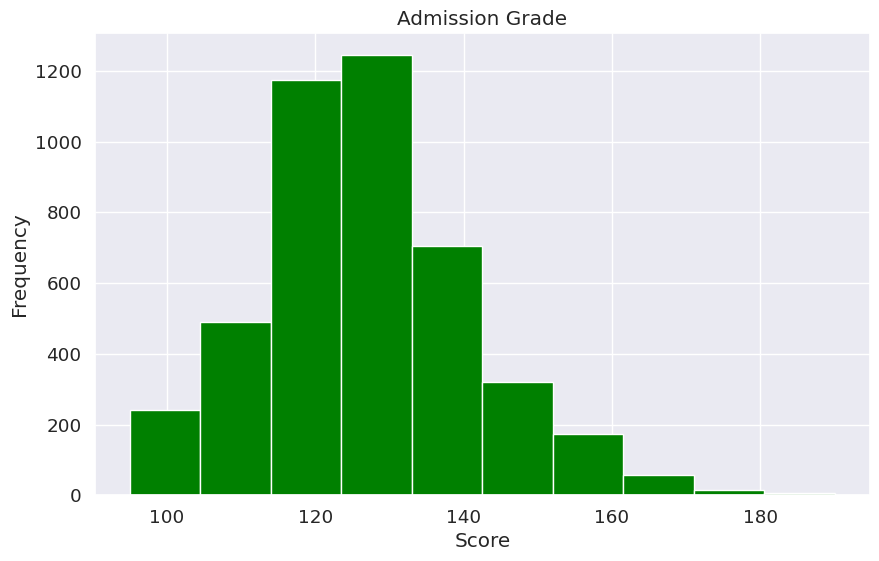

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(data['Admission grade'], bins=10, color='green')
plt.title('Admission Grade')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

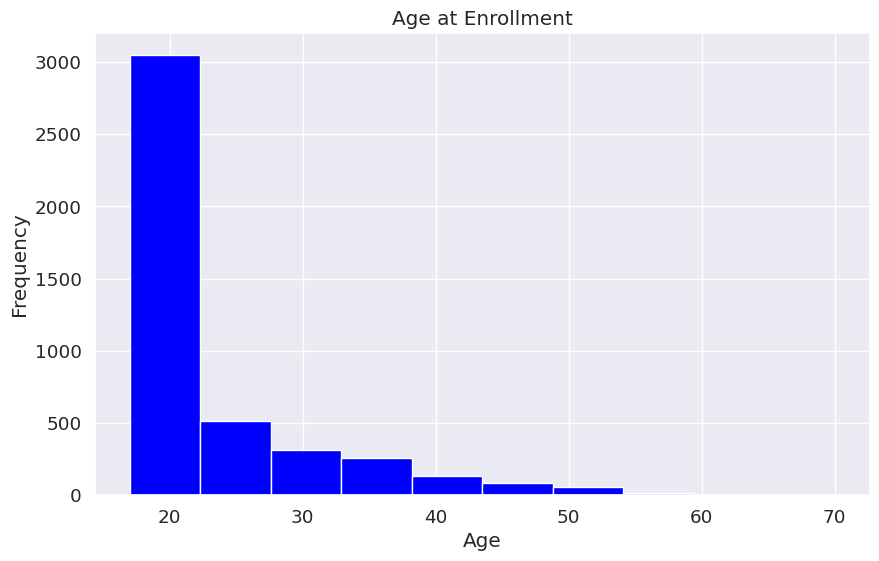

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age at enrollment'], bins=10, color='blue')
plt.title('Age at Enrollment')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

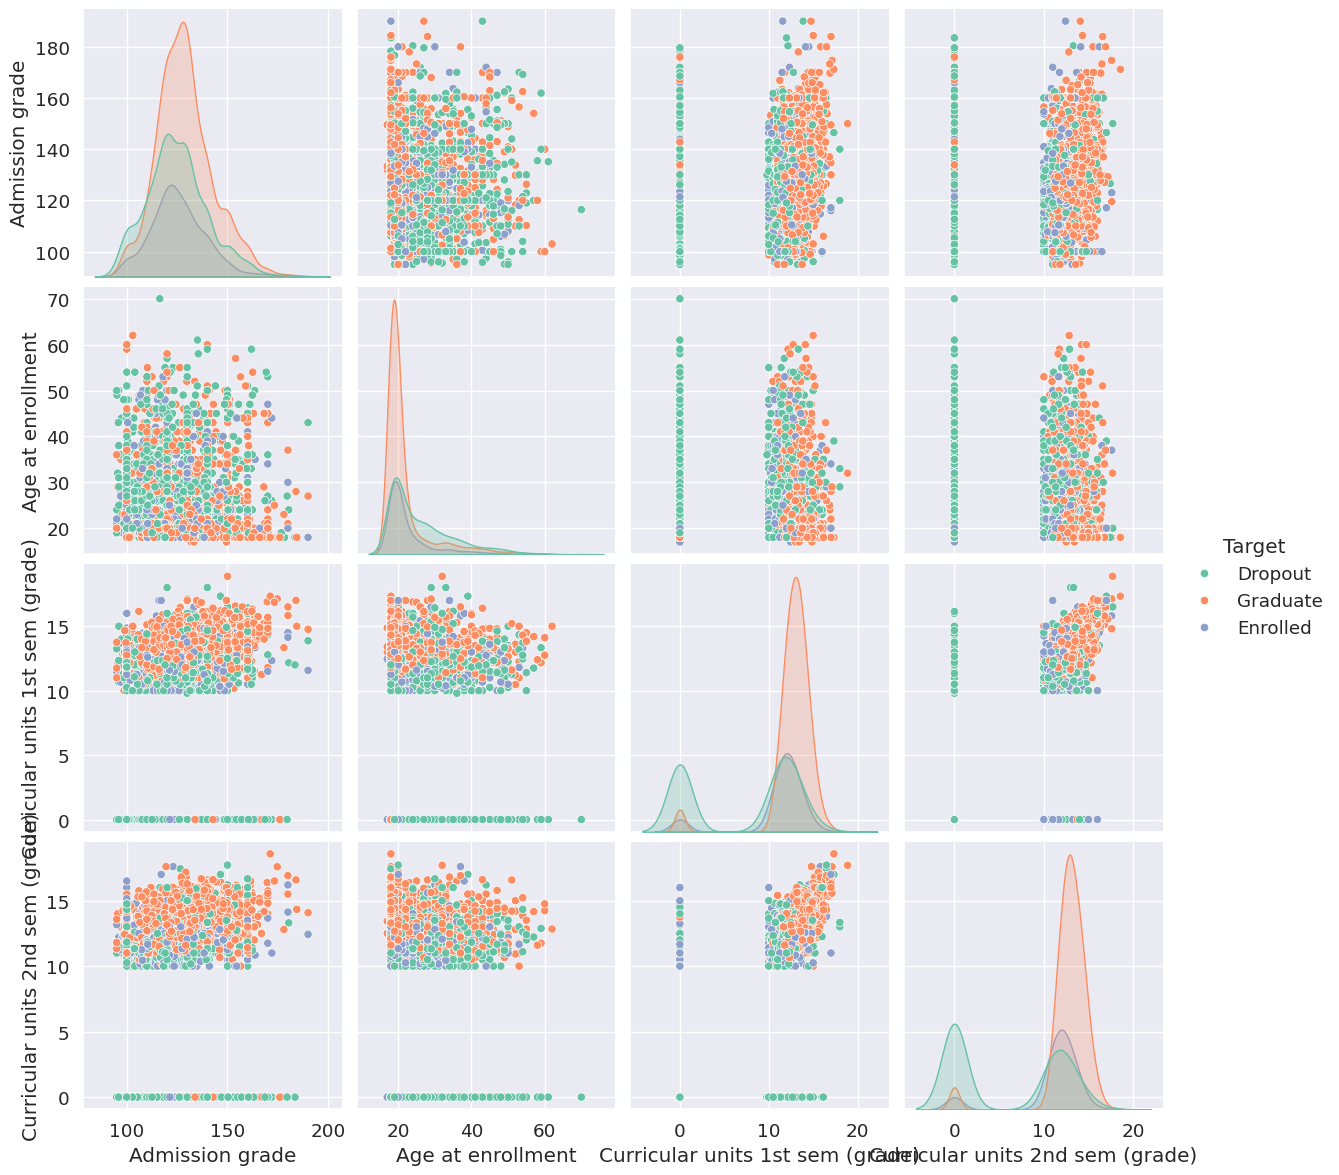

In [59]:
numeric_features = ['Admission grade', 'Age at enrollment',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']
sns.pairplot(data, hue='Target', vars=numeric_features, palette='Set2', height=3)
plt.show()

In [60]:
df = data.copy()
X = df.drop(columns=['Target'])
y = df['Target']

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, shuffle=False)

In [61]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree - Training Accuracy:", dt_model.score(X_train, y_train))
print("Decision Tree - Testing Accuracy:", dt_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree - Training Accuracy: 1.0
Decision Tree - Testing Accuracy: 0.6789077212806026
Confusion Matrix:
 [[248  63  59]
 [ 36  87  67]
 [ 52  64 386]]


In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest - Training Accuracy:", rf_model.score(X_train, y_train))
print("Random Forest - Testing Accuracy:", rf_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.7570621468926554
Confusion Matrix:
 [[267  37  66]
 [ 35  73  82]
 [ 13  25 464]]


In [64]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression - Training Accuracy:", lr_model.score(X_train, y_train))
print("Logistic Regression - Testing Accuracy:", lr_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression - Training Accuracy: 0.7804878048780488
Logistic Regression - Testing Accuracy: 0.7495291902071564
Confusion Matrix:
 [[269  48  53]
 [ 43  64  83]
 [ 17  22 463]]


In [65]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("SVC - Training Accuracy:", svc_model.score(X_train, y_train))
print("SVC - Testing Accuracy:", svc_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVC - Training Accuracy: 0.8301606186793575
SVC - Testing Accuracy: 0.7401129943502824
Confusion Matrix:
 [[255  50  65]
 [ 32  65  93]
 [ 15  21 466]]


In [66]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', max_iter=50)
mlp_model.fit(X_train, y_train)
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classifier - Training Accuracy:", mlp_model.score(X_train, y_train))
print("MLP Classifier - Testing Accuracy:", mlp_model.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

MLP Classifier - Training Accuracy: 0.9152290303390839
MLP Classifier - Testing Accuracy: 0.743879472693032
Confusion Matrix:
 [[275  45  50]
 [ 48  68  74]
 [ 24  31 447]]


In [67]:
rf_cvs = cross_val_score(estimator=rf_model, X=X_train, y=y_train, cv=10)
print("Random Forest - Cross-Validation Scores:", rf_cvs)
print("Mean Accuracy:", rf_cvs.mean())
print("Variance:", rf_cvs.std())

Random Forest - Cross-Validation Scores: [0.7537092  0.78041543 0.78571429 0.80059524 0.78869048 0.77083333
 0.78869048 0.77678571 0.75       0.79761905]
Mean Accuracy: 0.779305320050869
Variance: 0.016122062221479456


Part 2

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [69]:
df = pd.read_csv("Predict Student Dropout and Academic Success.csv", delimiter=';', index_col=0)

In [70]:
ncol = len(df.columns)
nrow = len(df)
print(f"{nrow} x {ncol}")
print(df.dtypes)

4424 x 36
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scho

In [71]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_vals = df[col].unique()
        map_to_int = {name: n for n, name in enumerate(unique_vals)}
        df[col] = df[col].replace(map_to_int)

print("Data types after encoding:")
print(df.dtypes)

Data types after encoding:
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                       

In [72]:
features = list(df.columns[:-1])
print("Features:", features)

Features: ['Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']


In [73]:
X = df[features]
y = df['Target']

<Figure size 2000x2000 with 0 Axes>

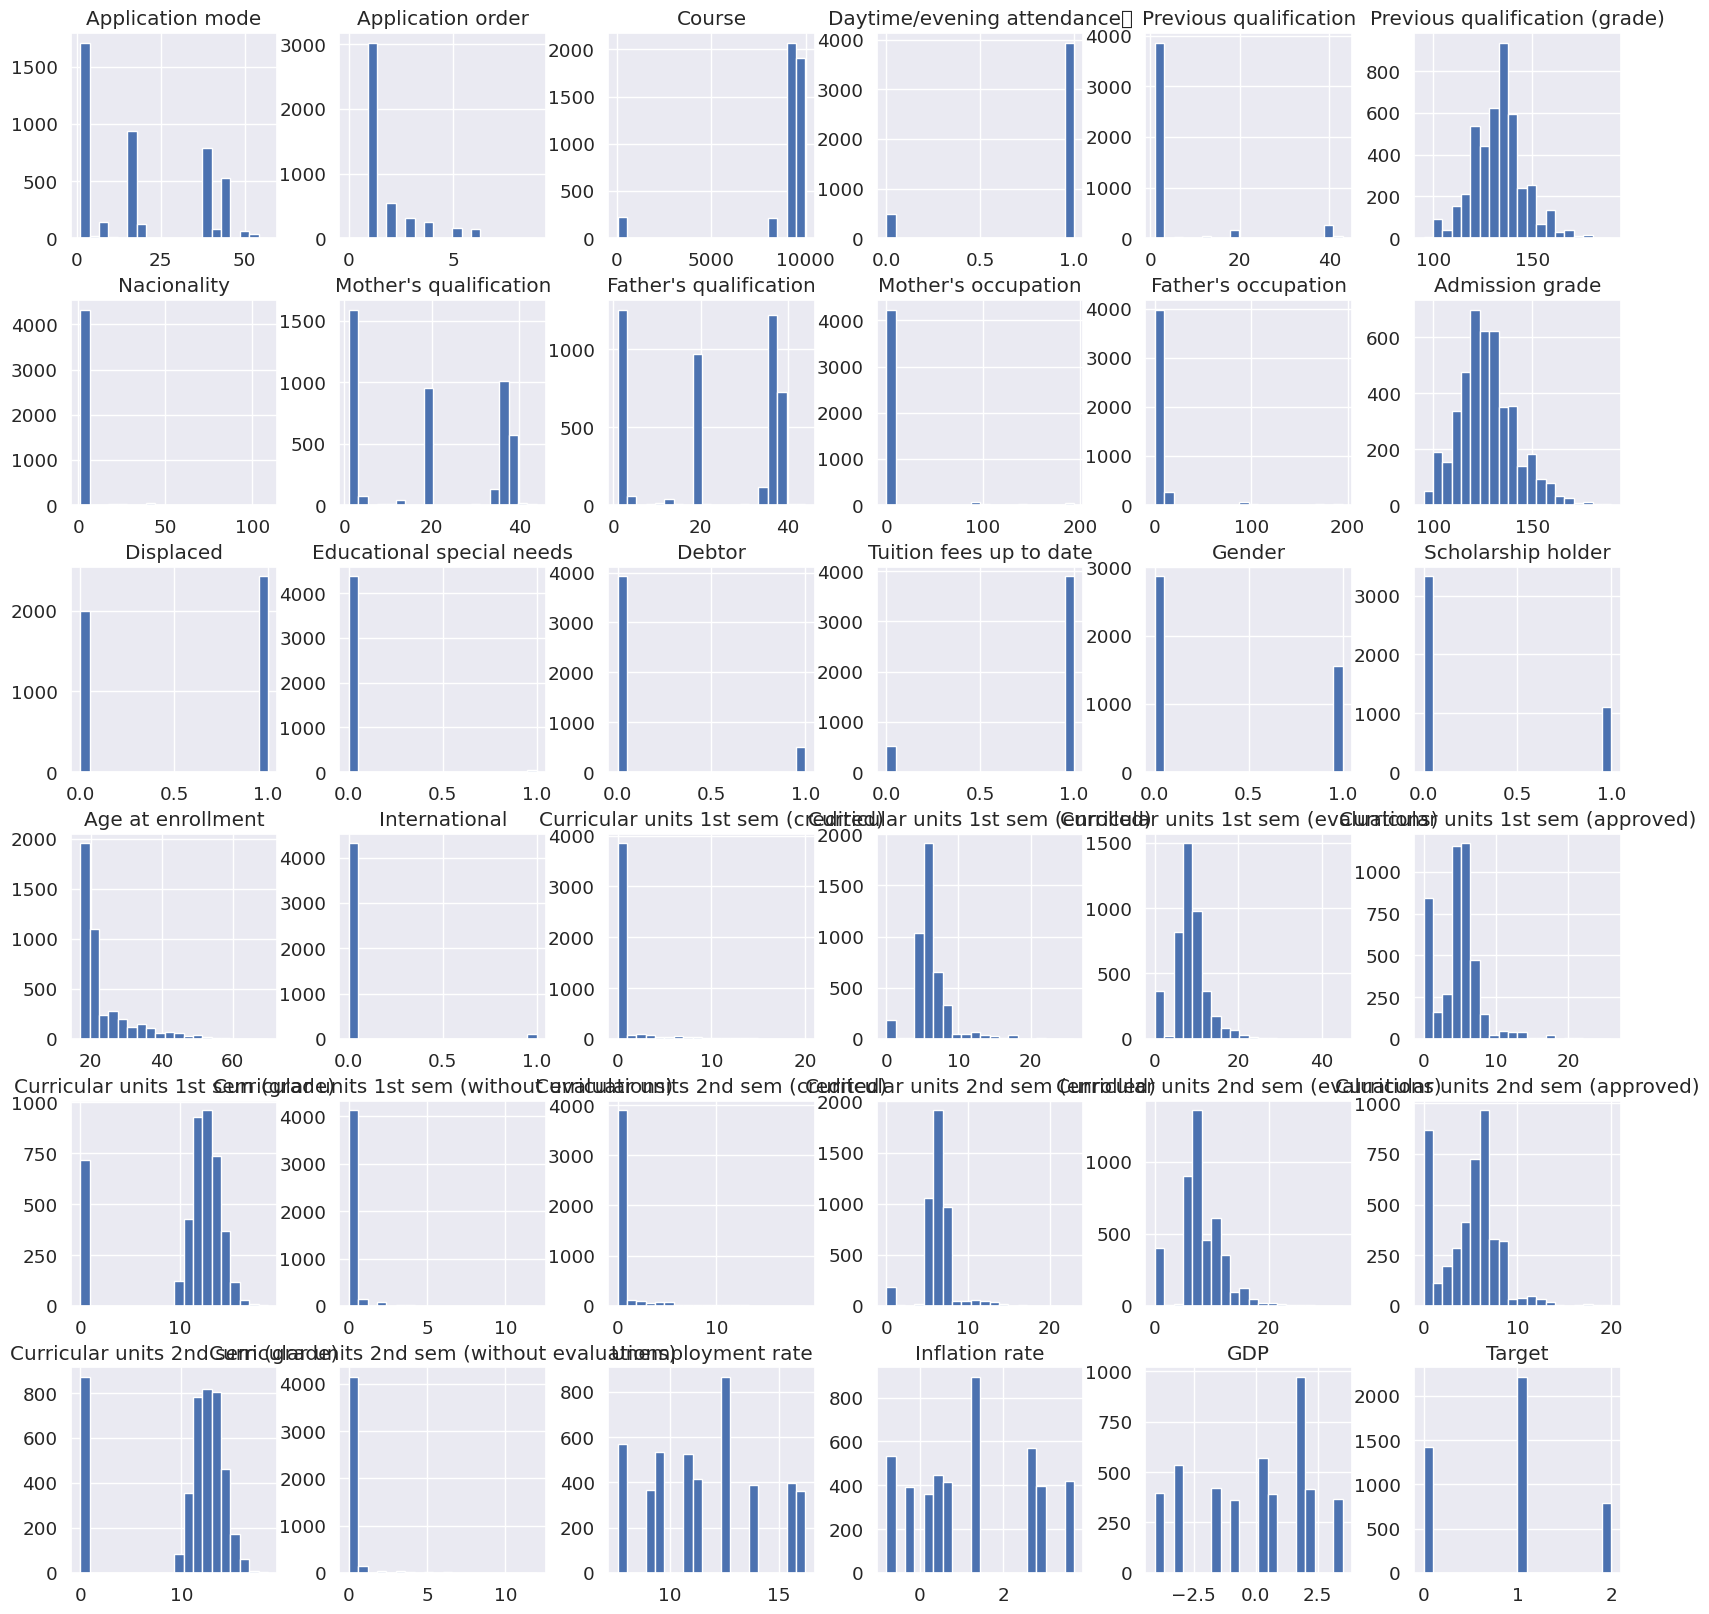

In [74]:
plt.figure(figsize=(20, 20))
df.hist(bins=20, figsize=(20, 20))
plt.show()

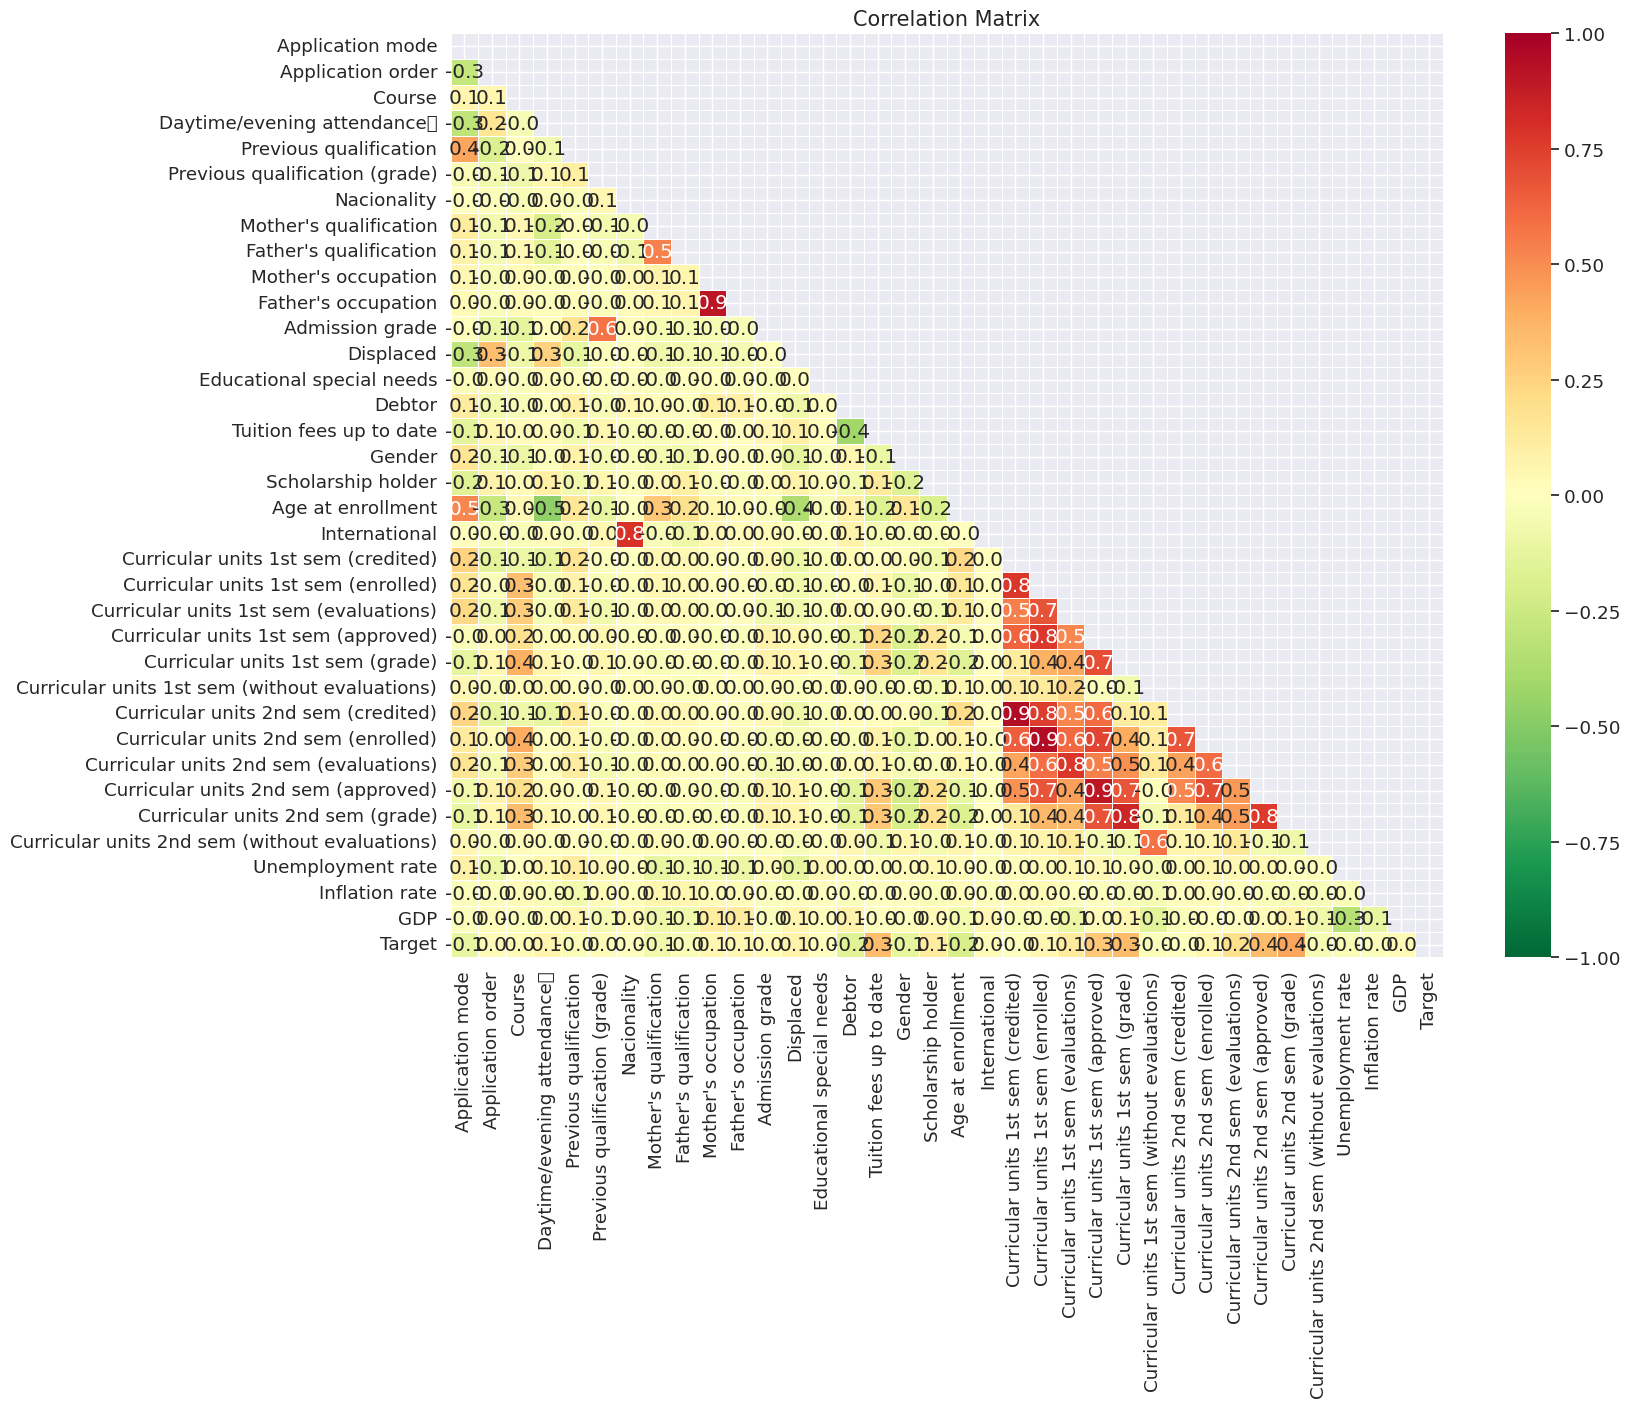

In [75]:
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, mask=mask, cmap='RdYlGn_r', vmax=1.0, vmin=-1, annot=True, linewidths=0.5, fmt='.1f')
plt.title("Correlation Matrix", size=15)
plt.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [77]:
clf = RandomForestClassifier(n_estimators=20)

In [78]:
param_dist = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [79]:
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5, random_state=42)
start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings." % (time() - start, n_iter_search))

RandomizedSearchCV took 10.55 seconds for 20 candidates parameter settings.


In [80]:
cv_results = pd.DataFrame(random_search.cv_results_)
print(cv_results[['mean_test_score', 'std_test_score', 'params']])

    mean_test_score  std_test_score  \
0          0.731268        0.004168   
1          0.729653        0.005371   
2          0.727394        0.005904   
3          0.775205        0.020282   
4          0.759368        0.006343   
5          0.734175        0.005728   
6          0.707367        0.014449   
7          0.726424        0.007918   
8          0.743538        0.005443   
9          0.768735        0.009024   
10         0.735141        0.009974   
11         0.771965        0.008952   
12         0.703492        0.007692   
13         0.773907        0.014244   
14         0.703488        0.010741   
15         0.770680        0.016796   
16         0.719958        0.006805   
17         0.669244        0.025505   
18         0.721581        0.008371   
19         0.770679        0.016074   

                                               params  
0   {'bootstrap': True, 'criterion': 'entropy', 'm...  
1   {'bootstrap': False, 'criterion': 'gini', 'max...  
2   {'bootst

In [81]:
best_params = random_search.best_params_
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=6,
                       min_samples_leaf=2, min_samples_split=6)

In [82]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
features_name = np.array(X.columns)


In [83]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {features_name[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. feature Curricular units 2nd sem (approved) (0.1509875401298784)
2. feature Curricular units 1st sem (approved) (0.11020134131507152)
3. feature Curricular units 2nd sem (grade) (0.1037489179802604)
4. feature Curricular units 1st sem (grade) (0.06607761725342921)
5. feature Curricular units 2nd sem (evaluations) (0.04875665183733223)
6. feature Tuition fees up to date (0.04175752112919105)
7. feature Admission grade (0.04090949318374307)
8. feature Curricular units 1st sem (evaluations) (0.03857442082056831)
9. feature Age at enrollment (0.03707547060043967)
10. feature Course (0.035034996446508454)
11. feature Previous qualification (grade) (0.032721128329045966)
12. feature Curricular units 2nd sem (enrolled) (0.024479037222001277)
13. feature Father's occupation (0.02338906162624615)
14. feature GDP (0.023063348935988666)
15. feature Mother's occupation (0.022492016942419747)
16. feature Curricular units 1st sem (enrolled) (0.02199430546627874)
17. feature Unemp

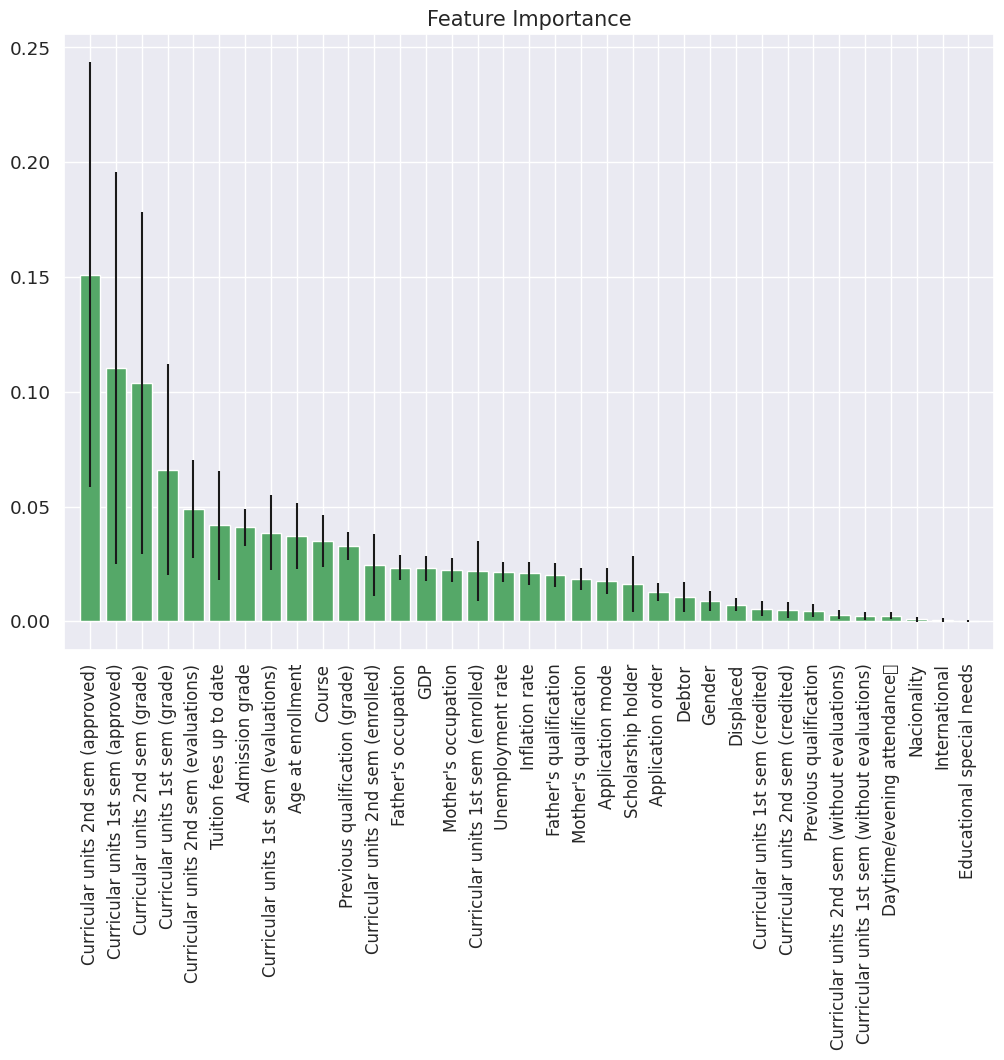

In [84]:
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", size=15)
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], color='g', align="center")
plt.xticks(range(X.shape[1]), features_name[indices], rotation=90, fontsize=12)
plt.xlim([-1, X.shape[1]])
plt.show()

Novelty


In [88]:
# in order to improve our predictive model, we will keep only the top most important features.

indices = np.argsort(importances)[::-1]

# calculate the number of top features to keep 50%
num_features = len(indices) // 2

# select the top 50% of features
top_indices = indices[:num_features]
top_features = X.columns[top_indices]

print("Top Features Selected (50%):", list(top_features))

# update X_train and X_test to keep only the top features
X_train = X_train.loc[:, top_features]
X_test = X_test.loc[:, top_features]

print("Updated X_train shape:", X_train.shape)
print("Updated X_test shape:", X_test.shape)


Top Features Selected (50%): ['Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Tuition fees up to date', 'Admission grade', 'Curricular units 1st sem (evaluations)', 'Age at enrollment', 'Course', 'Previous qualification (grade)', 'Curricular units 2nd sem (enrolled)', "Father's occupation", 'GDP', "Mother's occupation", 'Curricular units 1st sem (enrolled)', 'Unemployment rate']
Updated X_train shape: (3096, 17)
Updated X_test shape: (1328, 17)


In [89]:
# next, we will stack multiple classifiers to improve predictive capabilities. Earlier accuracies are around the 70% range.

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# define base models
base_models = [
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 100))),
]

# meta-classifier
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacked_clf.fit(X_train, y_train)

print("Stacking Classifier Test Accuracy:", stacked_clf.score(X_test, y_test))


Stacking Classifier Test Accuracy: 0.759789156626506


In [96]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [97]:
# employing grid search and trying again (improvement of 0.01)
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# define base models
base_models = [
    ('rf', RandomForestClassifier(max_depth= 10, min_samples_split= 5, n_estimators= 200)),
    ('svc', SVC(probability=True)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 100))),
]

# meta-classifier
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacked_clf.fit(X_train, y_train)

print("Stacking Classifier Test Accuracy:", stacked_clf.score(X_test, y_test))


Stacking Classifier Test Accuracy: 0.7605421686746988


In [105]:
# Example: Create interaction terms between grades and age
X_train['Age_Grade_Interaction'] = X_train['Age at enrollment'] * X_train['Admission grade']
X_test['Age_Grade_Interaction'] = X_test['Age at enrollment'] * X_test['Admission grade']

In [108]:
# trying with an interaction term and removing SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# define base models
base_models = [
    ('rf', RandomForestClassifier(max_depth= 10, min_samples_split= 5, n_estimators= 200)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100, 100))),
]

# meta-classifier
stacked_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacked_clf.fit(X_train, y_train)

print("Stacking Classifier Test Accuracy:", stacked_clf.score(X_test, y_test))


Stacking Classifier Test Accuracy: 0.7695783132530121
